## Problem Statement:

### Using the dataset, we have to predict what will be the SELLING PRICE of USED car

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/Ashish/Desktop/Python Projects/Car dekho/datasets_33080_1320127_car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


- Looking at the data, we can see that "Fuel_Type", "Seller_Type", "Owner" and "Transmission" are categorical features

In [10]:
# Unique values of all the Categorical Features

print(df["Fuel_Type"].unique())
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [11]:
# Checking the Null Values in the dataset

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

- There are no null values in the dataset

In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### In the dataset, we can see that there is a feature called "Year". So we have to derive a new feature called number of years from this Year feature to make more sense of the data.

In [14]:
# Create a new feature
df["Number_Of_Years"] = 2020 - df["Year"]

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [17]:
## Removing the car name column as it does not have any significant value

df = df.drop(["Car_Name"], axis = 1)

In [18]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [19]:
# Drop the "Year" feature as it is not required now

df = df.drop(["Year"], axis = 1)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Converting Categorical Features to Numerical Features

- Using Get Dummies

In [21]:
df = pd.get_dummies(df, drop_first = True)

In [22]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [23]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_Of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [24]:
# Display Correlation using heatmap

import seaborn as sns

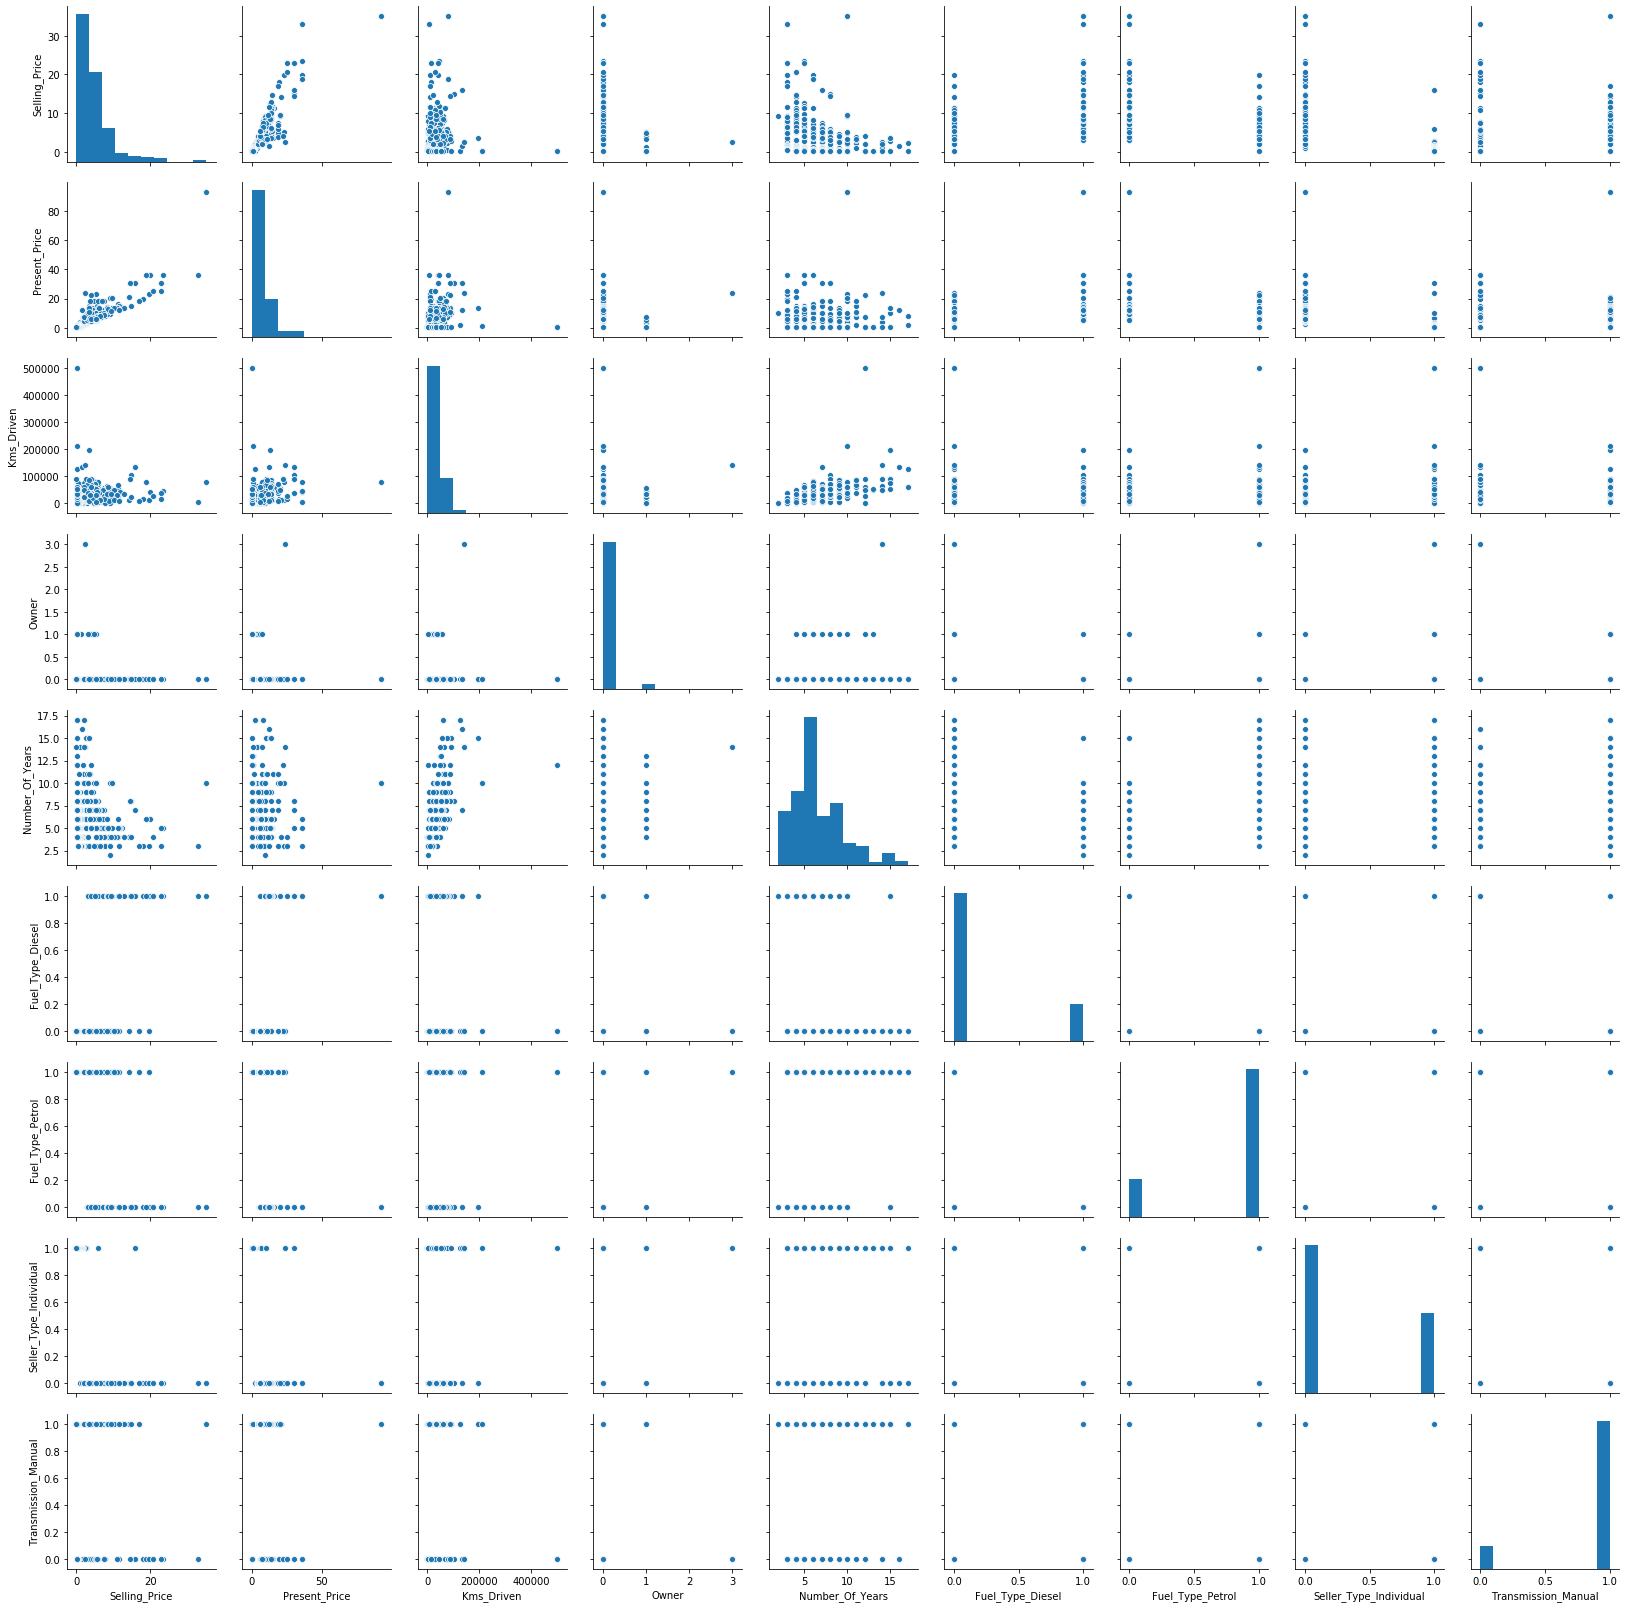

In [25]:
sns.pairplot(df)

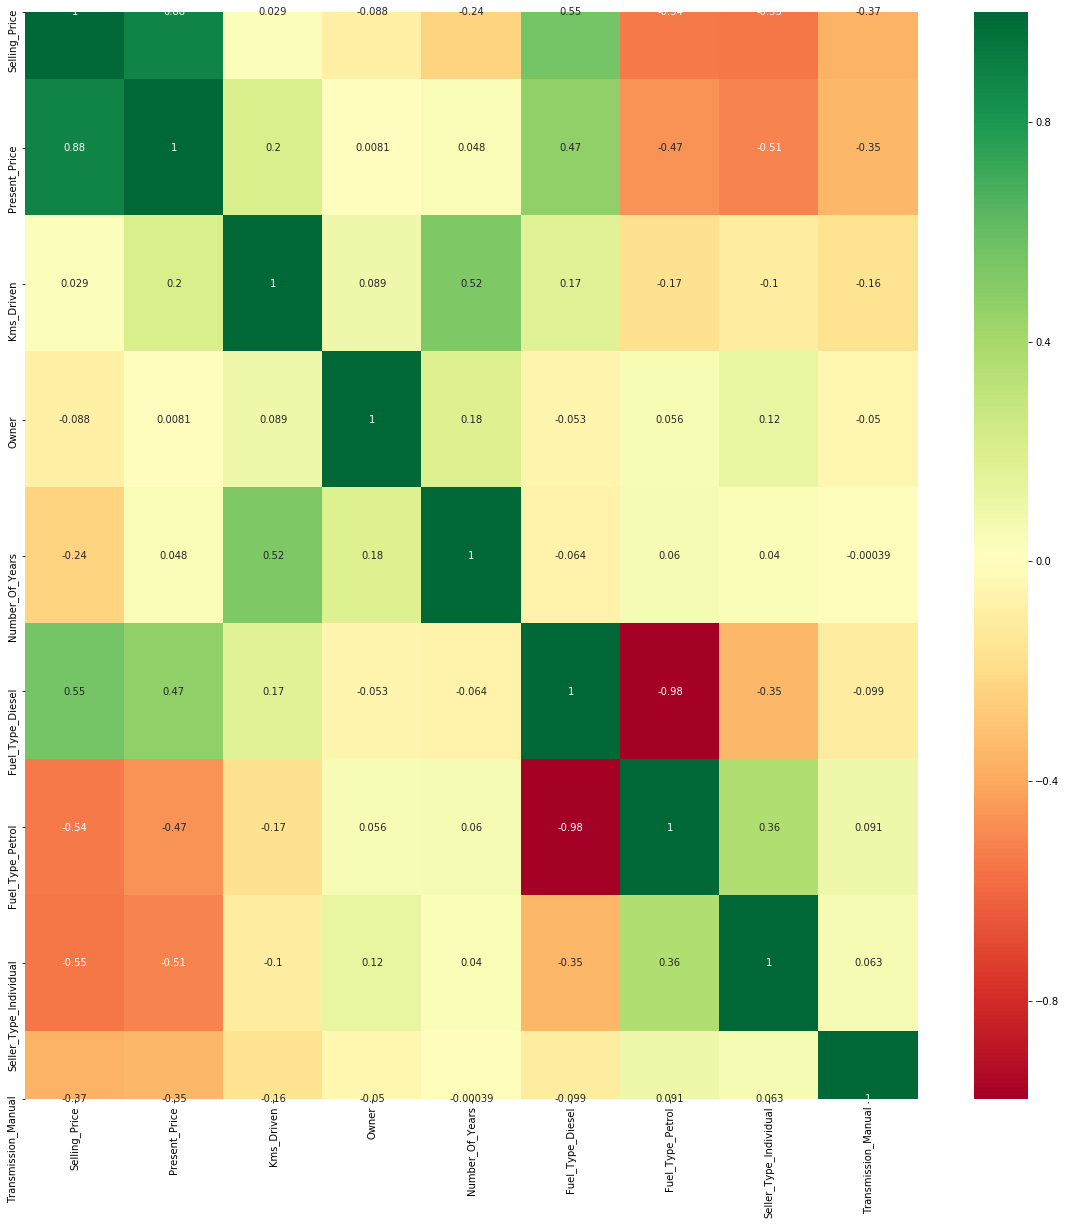

In [26]:
# Heatmap using seaborn

import matplotlib.pyplot as plt
%matplotlib inline
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [28]:
# Taking the independent features and dependent feature

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [29]:
X.head()

,Present_Price,Kms_Driven,Owner,Number_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [30]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [31]:
### Feature importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
print(model.feature_importances_)

[3.94567578e-01 4.15859425e-02 3.59072898e-04 7.84973104e-02
 2.08913210e-01 1.16788937e-02 1.39156124e-01 1.25241868e-01]


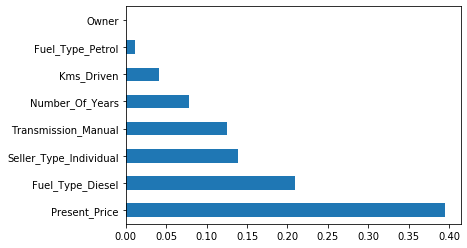

In [33]:
# plot feature importance

feat_importance = pd.Series(model.feature_importances_ , index = X.columns)
feat_importance.nlargest(8).plot(kind = "barh")
plt.show()

In [34]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [35]:
X_train.shape, X_test.shape

((240, 8), (61, 8))

In [36]:
y_train.shape, y_test.shape

((240,), (61,))

In [37]:
## RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [39]:
print(score)

0.8781418408597513


# As the R2 score is More towards 1, Therefore the model is a Good Model!!

In [41]:
## HyperParameter Tuning (Randomized Search CV)

import numpy as np
# n_estimators = No. of decision trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] 
# Number of features to be considered during every split
max_features = ["auto", "sqrt"]
# Maximum Number of Levels in Tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
# Minimum number of Smaples required to split a node
min_samples_split = [2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# Create the random Grid

random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
               "min_samples_split" : min_samples_split,
               "min_samples_leaf" : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
#initialize Random Forest Regressor

rf = RandomForestRegressor()

In [46]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = "neg_mean_squared_error", n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)

In [47]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
prediction = rf_random.predict(X_test)

In [49]:
prediction

array([ 1.34976,  7.79916,  0.3624 ,  1.2162 ,  2.62626,  4.1467 ,
        3.15379,  5.7552 ,  7.11778,  5.99788,  3.05808,  0.47797,
        6.81573,  0.44307,  4.18906,  0.61398,  0.79697,  0.60732,
        8.96687,  6.10145,  6.84879,  1.12363,  9.97516,  0.61356,
        5.62866,  0.51587,  8.2757 , 10.59622,  4.19734,  3.15638,
        0.70434,  0.90542,  8.71598,  4.86003,  0.97719,  4.26867,
        7.01665,  7.87765,  6.71581, 10.60962,  8.0249 ,  5.2124 ,
        4.28413,  9.67976,  0.60082,  0.58822,  2.9174 , 16.76821,
        3.06165,  0.52213,  8.24973,  0.3194 ,  5.77569,  2.78813,
        8.30825,  0.59612,  3.0939 ,  2.47677,  9.42948,  0.99297,
        0.41644])

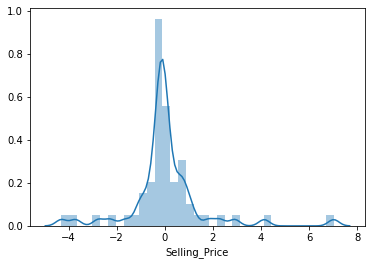

In [50]:
sns.distplot(y_test-prediction)

# y_test is the real value and prediction is our predicted value. 
# When we take difference of y_test and prediction, it should be minimum i.e. closer to 0
# This can be seen in the graph. Most of the values are Zero

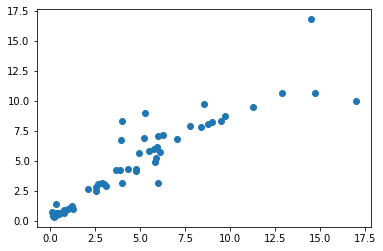

In [51]:
plt.scatter(y_test, prediction)

# Linear distribution shows that y_test value is same as prediction value ( when y_test is 2.5 prediction is almost = 2.5) 

## We can see that the given distirbution is a Normal Distribution and The Scatter Plot is linearly progressing. Hence Our prediction is pretty Good!!

In [52]:
## Creating a Pickle File

import pickle
#open a file where you want to store the data
file = open("Car_Dekho.pkl", "wb")

#dump information to that file

pickle.dump(rf_random, file)